In [121]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [122]:
df1 = pd.read_csv('Credit_card.csv')
df2 = pd.read_csv('Credit_card_label.csv')

In [123]:
df = pd.merge(df1, df2, on='Ind_ID', how='right')
# pd.set_option('display.max_rows', None)
# df.head()

In [124]:
df.shape

(1548, 19)

In [125]:
# df.isnull().sum()

In [126]:
modes = df.mode().iloc[0]
df = df.fillna(modes)
# df.isnull().sum()

In [127]:
# df.dtypes

In [128]:
df['Annual_income'] = df['Annual_income'].astype('int64')
# df.head()

In [129]:
df.rename(columns={'Propert_Owner': 'Property_Owner'}, inplace=True)
# df.head()

In [130]:
correlation = df['Birthday_count'].corr(df['label'])
print(correlation)

-0.042531768327068085


In [131]:
df=df.drop('Birthday_count', axis=1)
df.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,135000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,Laborers,2,1


In [132]:
correlation = df['Employed_days'].corr(df['label'])
print(correlation)

0.03140829363314299


In [155]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

# Option 1: Apply LabelEncoder to each non-numeric column
for col in non_numeric_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

print("DataFrame after Label Encoding:")
print(df)

# Reset the DataFrame for One-Hot Encoding example
df = pd.DataFrame(df)

# Option 2: Apply OneHotEncoder to non-numeric columns
one_hot_enc = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_features = one_hot_enc.fit_transform(df[non_numeric_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_enc.get_feature_names_out(non_numeric_cols))

# Combine the encoded features with the original DataFrame
df = pd.concat([df.drop(columns=non_numeric_cols), encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
# df

DataFrame after Label Encoding:
       Ind_ID  GENDER  Car_Owner  Property_Owner  CHILDREN  Annual_income  \
0     5008827       1          1               1         0         180000   
1     5009744       0          1               0         0         315000   
2     5009746       0          1               0         0         315000   
3     5009749       0          1               0         0         135000   
4     5009752       0          1               0         0         315000   
...       ...     ...        ...             ...       ...            ...   
1543  5028645       0          0               1         0         135000   
1544  5023655       0          0               0         0         225000   
1545  5115992       1          1               1         2         180000   
1546  5118219       1          1               0         0         270000   
1547  5053790       0          1               1         0         225000   

      Type_Income  EDUCATION  Marital_statu

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000,1,1,1,1,365243,0,0,0,8,2,1
1,5009744,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
2,5009746,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
3,5009749,0,1,0,0,135000,0,1,1,1,-586,1,1,0,8,2,1
4,5009752,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000,0,1,1,1,-2182,0,0,0,10,2,0
1544,5023655,0,0,0,0,225000,0,2,3,1,-1209,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000,3,1,1,1,-2477,0,0,0,10,4,0
1546,5118219,1,1,0,0,270000,3,4,0,1,-645,1,1,0,4,2,0


In [134]:
# Remove constant features using VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)

# Fit finds the features with zero variance
feature_selector.fit(df)

VarianceThreshold(threshold=0)

In [135]:
# Get Feature Support
# Returns True if value is not constant else False
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True])

In [136]:
# Features that are constant
[x for x in df.columns if x not in df.columns[feature_selector.get_support()]]

['Mobile_phone']

In [137]:
df = df.drop(columns=['Mobile_phone'])
df

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000,1,1,1,1,365243,0,0,0,8,2,1
1,5009744,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
2,5009746,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
3,5009749,0,1,0,0,135000,0,1,1,1,-586,1,1,0,8,2,1
4,5009752,0,1,0,0,315000,0,1,1,1,-586,1,1,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,135000,0,1,1,1,-2182,0,0,0,10,2,0
1544,5023655,0,0,0,0,225000,0,2,3,1,-1209,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000,3,1,1,1,-2477,0,0,0,10,4,0
1546,5118219,1,1,0,0,270000,3,4,0,1,-645,1,1,0,4,2,0


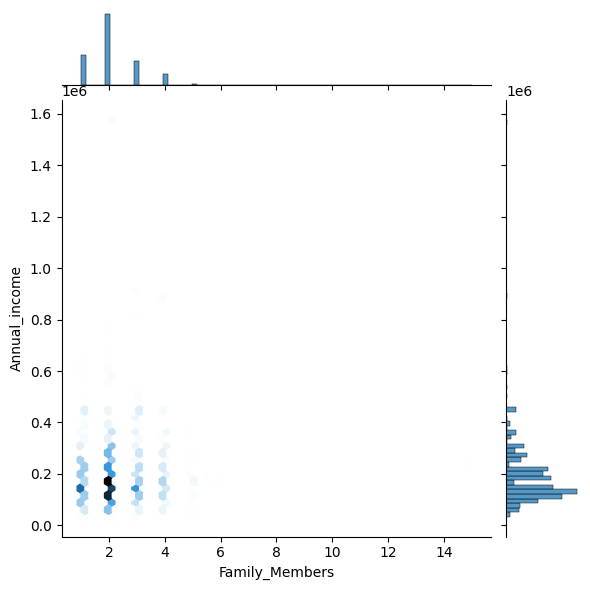

In [157]:
sns.jointplot(x='Family_Members',y='Annual_income',data=df,kind='hex')

<Axes: >

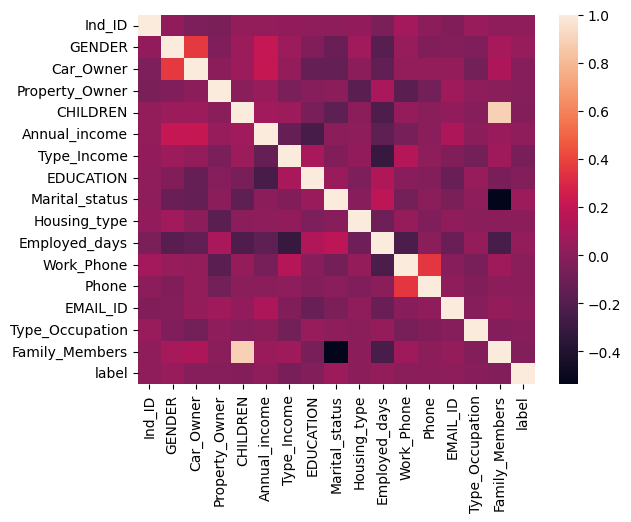

In [156]:
sns.heatmap(df.corr())

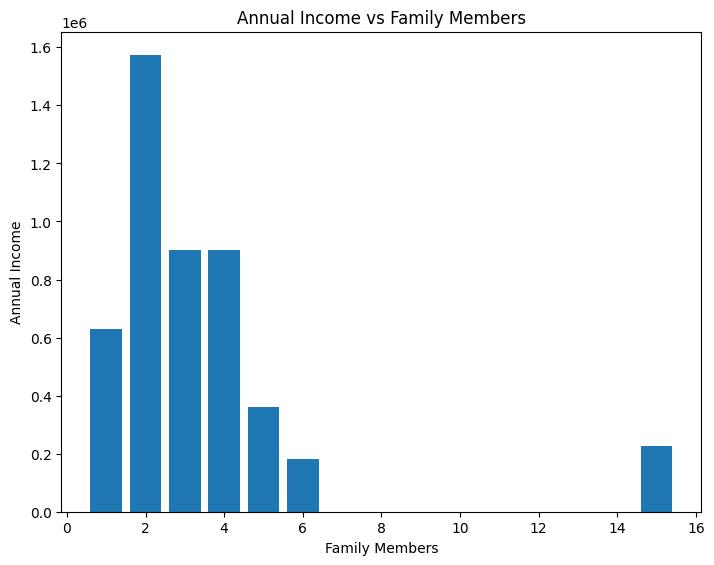

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['Family_Members'] , df['Annual_income'])
plt.ylabel('Annual Income')
plt.xlabel('Family Members')
plt.title('Annual Income vs Family Members')
plt.show()

<ipython-input-158-82283f2fc9aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_income'])


<Axes: xlabel='Annual_income', ylabel='Density'>

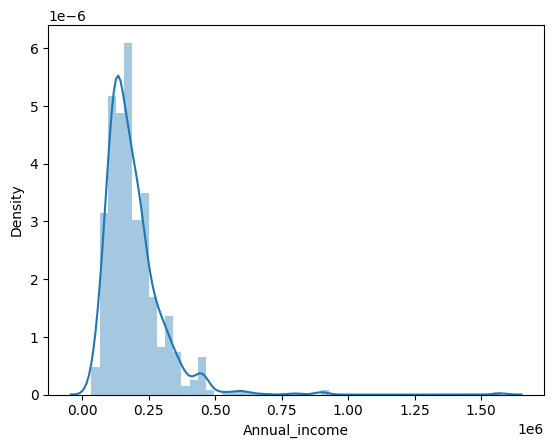

In [158]:
sns.distplot(df['Annual_income'])

<Axes: xlabel='Family_Members', ylabel='Annual_income'>

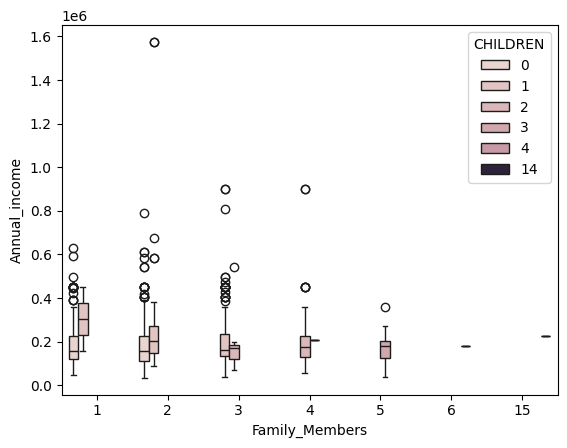

In [161]:
sns.boxplot(y="Annual_income", x="Family_Members", hue="CHILDREN",data=df)

In [142]:
x= df.iloc[:, [0,15]].values
y= df.iloc[:, 16].values

array([[5008827,       2],
       [5009744,       2],
       [5009746,       2],
       ...,
       [5115992,       4],
       [5118219,       2],
       [5053790,       2]])

LOGISTIC REGRESSION MODEL (LRM)

In [144]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size= 0.25, random_state=12)

In [145]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train1= st_x.fit_transform(x_train1)
x_test1= st_x.transform(x_test1)

In [146]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state=2)
classifier1.fit(x_train1, y_train1)

LogisticRegression(random_state=2)

In [147]:
y_pred1= classifier1.predict(x_test1)
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test1,y_pred1)
cm1

array([[347,   0],
       [ 40,   0]])

In [148]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'Accuracy(LRM): {accuracy1}')

Accuracy(LRM): 0.896640826873385


Support Vector Machine (SVM)

In [149]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size= 0.3, random_state=7)

In [150]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train2= st_x.fit_transform(x_train2)
x_test2= st_x.transform(x_test2)

In [151]:
from sklearn.svm import SVC
classifier2 = SVC(kernel='linear', random_state=5)
classifier2.fit(x_train2, y_train2)

SVC(kernel='linear', random_state=5)

In [152]:
y_pred2= classifier2.predict(x_test2)
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(y_test2,y_pred2)
cm2

array([[410,   0],
       [ 55,   0]])

In [153]:
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy(SVM): {accuracy2}')

Accuracy(SVM): 0.8817204301075269


Accuracy Plot

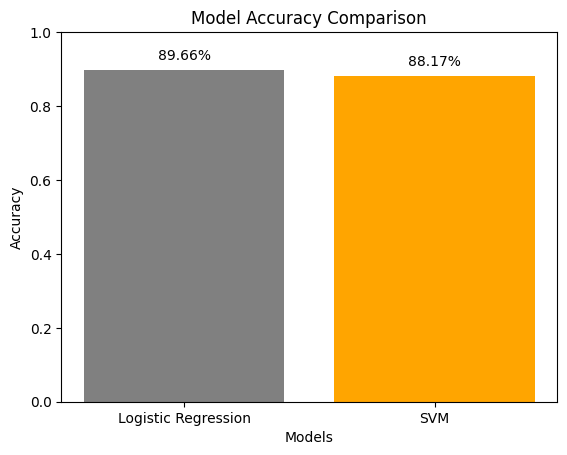

In [154]:
# Create bar plot
models = ['Logistic Regression', 'SVM']
accuracies = [accuracy1, accuracy2]
accuracies_percent = [accuracy * 100 for accuracy in accuracies]

plt.bar(models, accuracies, color=['grey', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 for better visualization

# Annotate bars with accuracy values in percentage
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies_percent[i]:.2f}%', ha='center', va='bottom')

plt.show()